# Lesson I 

## Exploring Relationships

So far we have only looked at one variable at a time. Now it's time to explore relationships between variables.

## Height and Weight

As a first example, we'll look at the relationship between height and weight. I'll use data from the Behavioral Risk Factor Surveillance Survey, or BRFSS, which is run by the Centers for Disease Control. The survey includes more than 400,000 respondents, but to keep things manageable, we'll use a random subsample of 100,000.

<img src='pictures/handw.jpg' width=500 />

## Scatter Plot

A common way to visualize the relationship between two variables is a scatter plot. Scatter plots are common and readily understood, but they are surprisingly hard to get right.

To demonstrate, I'll load the *BRFSS* dataset and extract the variables for height in centimeters and weight in kilograms. *pyplot* provides a ``scatter()`` function that makes a scatter plot, but it is more versatile than we need and slower than we want.

It is faster to use ``plot()`` with the format string ``'o'``, which plots a circle for each data point. And, as always, we have to label the axes.

In [28]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import empyrical_dist
from empyrical_dist import Pmf
import seaborn as sns

# Datasets
brfss = pd.read_hdf('datasets/brfss.hdf5', 'brfss')

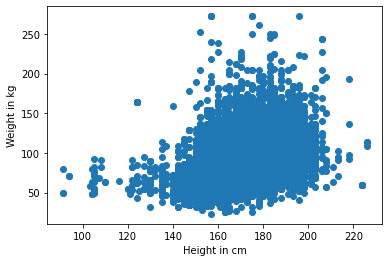

In [2]:
# Select the Columns
height = brfss['HTM4']
weight = brfss['WTKG3']

# Plot the scatter plot
plt.plot(height, weight, 'o')

# Label the axes
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

# Show the plot
plt.show()

### Overplotting

Here's what it looks like. In general, it looks like taller people are heavier, but there are a few things about this scatter plot that make it hard to interpret.

Most importantly, it is *"overplotted"*, which means that there are data points piled on top of each other so you can't tell where there are a lot of points and where there is just one. When that happens, the results can be really misleading.

### Transparency

One way to improve it is to use transparency, which we can do with the *alpha* parameter. The lower the value of alpha, the more transparent each data point is. Here's what it looks like with ``alpha=0.02``.

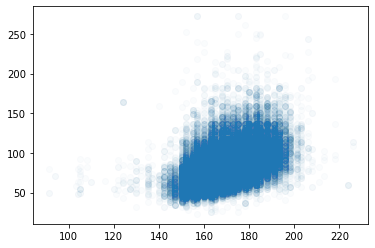

In [3]:
# Using Transparency
plt.plot(height, weight, 'o', alpha=0.02)

# Show the plot
plt.show()

This is better, but there are so many data points, the scatter plot is still overplotted. The next step is to make the markers smaller.

### Marker Size

With ``markersize=1`` and a low value of alpha, the scatter plot is less saturated. Here's what it looks like.

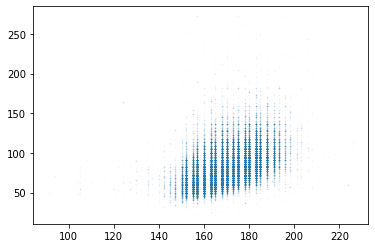

In [4]:
# Smaller Marker Size
plt.plot(height, weight, 'o', markersize=1, alpha=0.02)

# Show plot
plt.show()

Again, this is better, but now we can see that the points fall in discrete columns. That's because most heights were reported in inches and converted to centimeters.

We can break up the columns by adding some random *noise* to the values; in effect, we are filling in the values that got rounded off.

### Jittering

Adding random noise like this is called **"jittering"**. In this example, I added noise with *mean 0* and *standard deviation 2*. Here's what the plot looks like when we jitter height. 

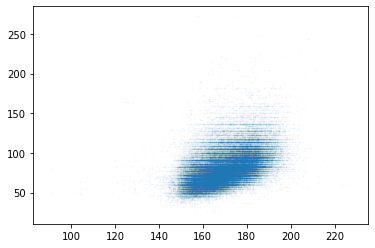

In [6]:
# Jittering
height_jitter = height + np.random.normal(0, 2, size=len(brfss))

# Plot the data
plt.plot(height_jitter, weight, 'o', markersize=1, alpha=0.02)

# Show plot
plt.show()

The columns are gone, but now we can see that there are rows where people rounded off their weight. We can fix that by jittering weight, too.

#### More Jittering

Here's the code. And here's the result. 

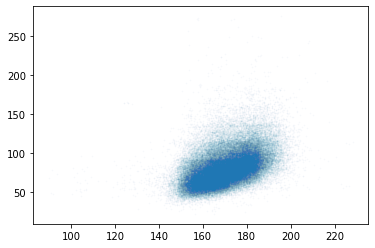

In [7]:
# More Jittering
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))

# Plot the Data
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)

# Show plot
plt.show()

Finally, let's zoom in on the area where most of the data points are.

### Zoom

The *pyplot* function ``axis()`` sets the lower and upper bounds for the x- and y-axis; in this case, we plot heights from 140 to 200 centimeters and weights up to 160 kilograms. Here's what it looks like.

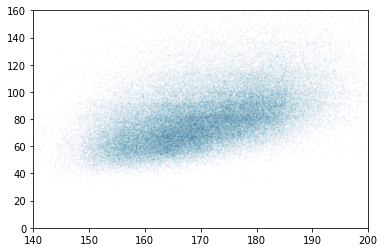

In [8]:
# Plot the Data
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)

# Zoom into Data
plt.axis([140, 200, 0, 160])

# Show plot
plt.show()

The plot we started with and the one we ended with. Clearly, they are very different, and they sugggest different stories about the relationship between these variables.

## Exercise

### PMF of Age

Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a ``.bar()`` method to make a bar chart.

The *BRFSS* dataset includes a variable, ``'AGE'`` (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. ``'AGE'`` contains the midpoint of the bins.

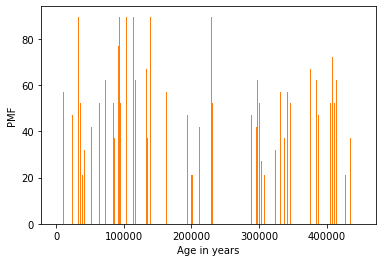

In [18]:
# Extract age
age = brfss['AGE']

# Plot the PMF
pmf_age = Pmf(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()


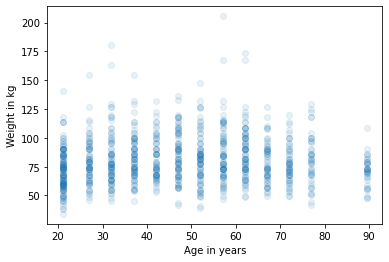

In [14]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

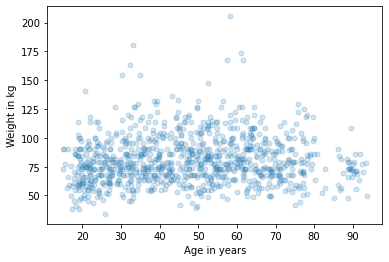

In [19]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

# Lesson II

## Visualizing Relationships

In the previous lesson we used scatter plots to visualize relationships between variables, and in the exercise, you explored the relationship between age and weight. In this lesson, we'll see other ways to visualize these relationships, including boxplots and violin plots.

In the previous exercises, you made a scatter plot of weight versus age. Your code probably looked like this. And the results looked like this. It looks like older people might be heavier, but it is hard to see clearly.

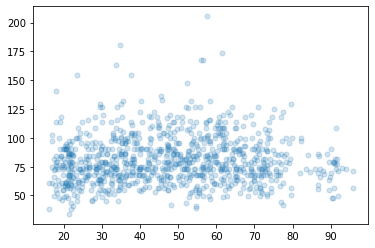

In [22]:
brfss1K = brfss[:1000]
age = brfss1K['AGE'] + np.random.normal(0, 2.5, size=len(brfss1K))
weight = brfss1K['WTKG3']
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)
plt.show()

#### More Data

For the exercises, you worked with a small subset of the data. Now let's see what it looks like with more data. Here's the code. And here's the plot. I made a few changes in the code:

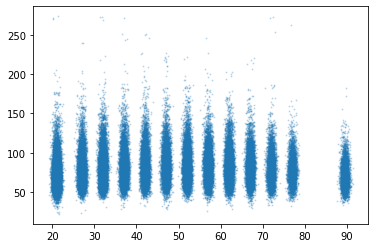

In [23]:
# Jittering
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))

# Plot the Data
plt.plot(age, weight, 'o', markersize=1, alpha=0.2)

# Show plot
plt.show()

* First, I reduced the marker size, because we have more data now, 
* Second, I jittered the weights, so the horizontal rows are not visible. 
* I jitter the ages, too, but less than in the exercise, so the data points are spread out, but there's still space between the columns. 

That makes it possible to see the shape of the distribution in each age group, and the differences between groups. If we take this idea one step farther, we can use KDE to estimate the density function in each column and plot it.

### Violin Plot

And there's a name for that; it's called a *violin plot*. *Seaborn* provides a function that makes violin plots, but before we can use it, we have to get rid of any rows with missing data. Here's how.

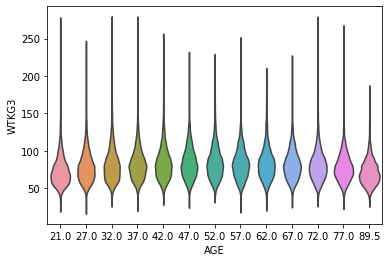

In [24]:
# Drop NaN Values
data = brfss.dropna(subset=['AGE', 'WTKG3'])

# Plot the data
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)

# Show plot
plt.show()

``dropna()`` creates a new DataFrame that contains the rows from ``brfss`` where ``AGE`` and ``WTKG3`` are not ``NaN``. 

Now we can call ``violinplot()``. The ``x`` and ``y`` parameters mean we want ``AGE`` on the x-axis and ``WTKG3`` on the y-axis. ``data`` is the DataFrame we just created, which contains the variables we're going to plot. The parameter ``inner=None`` simplifies the plot a little. 

Each column is a graphical representation of the distribution of weight in one age group. The width of these shapes is proportional to the estimated density, so it's like two vertical PDFs plotted back to back, and filled in with nice colors. 

There's one other way to look at data like this, called a *box plot*.

### Box Plot

The code to generate a box plot is very similar. I put in the parameter ``whis=10`` to turn off a feature we don't need. Here's what it looks like. 

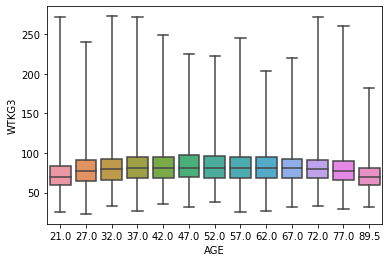

In [25]:
# Plot the data
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)

# Show plot
plt.show()

Each box represents the *interquartile range*, or *IQR*, from the 25th to the 75th percentile. The line in the middle of each box is the *median*. The spines sticking out of the top and bottom show the *minimum and maximum values*. 

In my opinion, this plot gives us the best view of the relationship between weight and age. Looking at the medians, it seems like people in their 40s are the heaviest; younger and older people are lighter. 

Looking at the sizes of the boxes, it seems like people in their 40s have the most variability in weight, too. These plots also show how skewed the distribution of weight is; that is, the heaviest people are much farther from the median than the lightest people.

### Log Scale

For data that skews toward higher values, it is sometimes useful to look at it on a logarithmic scale. We can do that with the *pyplot* function ``yscale()``. Here's what it looks like. To show the relationship between age and weight most clearly, this is probably the figure I would use.

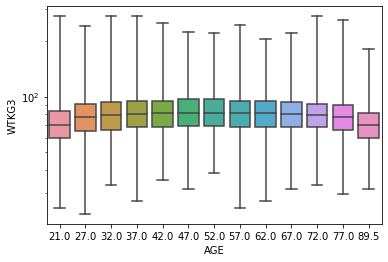

In [26]:
# Plot the data
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)

# Use Log scale
plt.yscale('log')

# Show plot
plt.show()

## Exercise

### Height and Weight

Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The ``brfss`` DataFrame contains a variable ``'_HTMG10'`` that represents *height* in centimeters, binned into 10 cm groups.

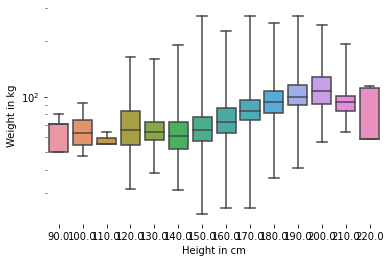

In [27]:
# Drop rows with missing data
data = brfss.dropna(subset=(['_HTMG10', 'WTKG3']))

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log sclae
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

# Show plot
plt.show()

### Distribution of income

In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is ``'INCOME2'``. 

Before we connect income with anything else, let's look at the distribution by computing the PMF.

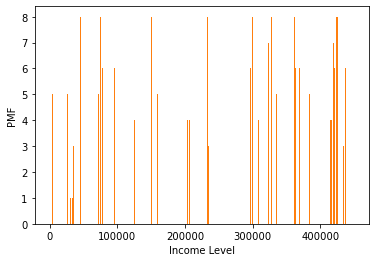

In [29]:
# Extract income
income = brfss['INCOME2']

# Plot the PMF
pmf_income = Pmf(income)
pmf_income.bar()

# Label the axes
plt.xlabel('Income Level')
plt.ylabel('PMF')

# Show plot
plt.show()

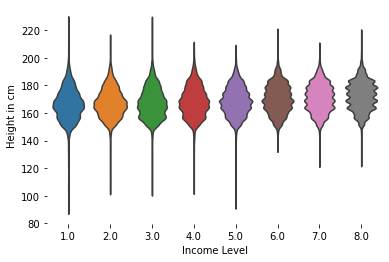

In [30]:
# Drop rows with missing data
data = brfss.dropna(subset=(['INCOME2', 'HTM4']))

# Make a violin plot
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income Level')
plt.ylabel('Height in cm')

# Show plot
plt.show()

# Lesson III

## Correlation

In the previous lesson, we visualized relationships between pairs of variables. In this lesson we'll learn about the coefficient of correlation, which quantifies the strength of these relationships.

### Correlation Coefficient

When people say *"correlation"* casually, they might mean any relationship between two variables. In statistics, it usually means *Pearson's correlation coefficient*, which is a number between **-1 and 1** that quantifies the strength of a linear relationship between variables. 

To demonstrate, I'll select three columns from the ``BRFSS`` dataset. The result is a DataFrame with just those columns. Now we can use the ``corr()`` method, like this.

In [31]:
# Select 3 columns from BRFss
columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]

# Show Correlation
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


This is a correlation matrix :

* Height with istself : 1
* Height and weight : 0.47
* Height and age : -0.09
* Weight and age : 0.02

Reading across the first row, the correlation of HTM4 with itself is 1. That's expected; the correlation of anything with itself is 1. 

The next entry is more interesting; the correlation of height and weight is about 0 point 47. It's positive, which means taller people are heavier, and it is moderate in strength, which means it has some predictive value. If you know someone's height, you can make a better guess about their weight, and vice versa. 

The correlation between height and age is about -0 point 09. It's negative, which means that older people tend to be shorter, but it's weak, which means that knowing someone's age would not help much if you were trying to guess their height. 

The correlation between age and weight is even smaller. It is tempting to conclude that there is no relationship between age and weight, but we have already seen that there is. So why is the correlation so low?

### Weight and Age
Remember that the relationship between weight and age looks like? People in their 40s are the heaviest; younger and older people are lighter. So this relationship is **nonlinear**.

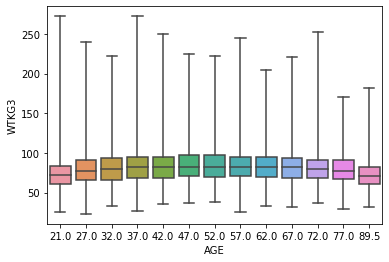

In [32]:
# Remember Weight and Age
# Plot the data
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)

# Show plot
plt.show()

## Nonlinear Relationships

But correlation only works for linear relationships. If the relationship is nonlinear, correlation generally underestimates how strong it is. To demonstrate, I'll generate some fake data:

In [39]:
# Fake data
xs = np.linspace(-1, 1)
ys = xs**2
ys += np.random.normal(0, 0.05, len(xs))
np.corrcoef(xs, ys)

array([[ 1.        , -0.00393501],
       [-0.00393501,  1.        ]])

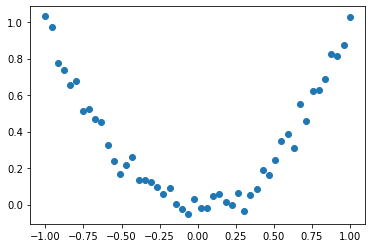

In [44]:
plt.scatter(x=xs, y=ys)
plt.show()

``xs`` contains equally-spaced points between -1 and 1. ``ys`` is ``xs`` squared plus some random noise. 

Here's the scatter plot of ``xs`` and ``ys``. It's clear that this is a strong relationship; if you are given `x`, you can make a much better guess about ``y``. 

But the correlation matrix; the computed correlation is close to 0.

***In general, if correlation is high -- that is, close to 1 or -1, you can conclude that there is a strong linear relationship. But if correlation is close to 0, that doesn't mean there is no relationship; there might be a strong, non-linear relationship. This is one of the reasons I think correlation is not such a great statistic.***


There's another reason to be careful with correlation; it doesn't mean what people take it to mean. Specifically, correlation says nothing about *slope*. If we say that two variables are correlated, that means we can use one to predict the other. But that might not be what we care about.

For example, suppose we are concerned about the health effects of weight gain, so we plot weight versus age, from 20 to 50 years old. Here are two fake datasets I generated:

<img src='pictures/twofakes.jpg' width=750 />

The one on the left has higher correlation, about 0 point 76 compared to 0 point 47. But on the left, the average weight gain over 30 years is less than 1 kg; on the right, it is almost 10 kilograms! In this scenario, the relationship on the right is probably more important, even though the correlation is lower. The statistic we really care about is the slope of the line.

## Exercise

### Computing Correlations

The purpose of the ``BRFSS`` is to explore health risk factors, so it includes questions about diet. The variable ``'_VEGESU1'`` represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income

In [46]:
# Select Columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


# Lesson IV

## Simple Regression

In the previous lesson we saw that correlation does not always measure what we really want to know. In this lesson, we look at an alternative - simple linear regression.

Let's look again at an example from the previous lesson, a hypothetical relationship between weight and age. I generated two fake datasets to make a point: 

<img src='pictures/twofakes.jpg' width=750 />

The one on the left has higher correlation, about 0 point 76 compared to 0 point 48. But in the one on the left, the average weight gain over 30 years is less than 1 kg; on the right, it is almost 10 kilograms! In this context, the statistic we probably care about is the slope of the line, not the correlation coefficient.

To estimate the slope of the line, we can use ``linregress()`` from the ``SciPy stats`` module. The result is a ``LinRegressResult`` object that contains *five* values: **slope** is the slope of the line of best fit for the data; **intercept** is the intercept.

```python
    from scipy.stats import linregress

    # Hypothetical 1
    res = linregress(xs, ys)
    # Output:
    '''
    Slope : 0.018821034903244386,
    intercept: 75.08049023710964
    '''
```

For Hypothetical #1, the estimated slope is about 0.019 kilograms per year or about 0.6 kilograms over the 30-year range.

Here are the results for Hypothetical #2:

```python
    # Hypothetical 2
    res = linregress(xs, ys)
    # Output:
    '''
    slope: 0.17642069806488855,
    intercept: 66.60980474219305
    '''
```

The estimated slope is about 10 times higher: about 0 point 18 kilograms per year or 6 kilograms per 30 years.

* **rvalue** : Correlation

### Regression lines

We can use the results from ``linregress()`` to compute the line of best fit: first we get the min and max of the observed ``xs``; then we multiply by the *slope* and **add** the *intercept*. And plot the line. Here's what that looks like:

```python
    fx = np.array([xs.min(), xs.max()])
    fy = res.intercept + res.slope * fx
    plt.plot(fx, fy, '-')
```

<img src='pictures/reglines.jpg' />

The visualization here might be misleading unless you look closely at the vertical scales; the slope on the right is almost 10 times higher.

## Height and Weight

Now let's look at an example with real data. Here's the scatter plot of height and weight again, from Lesson 1.

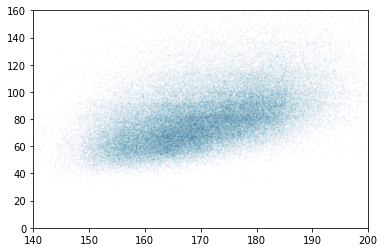

In [47]:
# From Lesson I Height and Weight

# Plot the Data
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)

# Zoom into Data
plt.axis([140, 200, 0, 160])

# Show plot
plt.show()

### Regression Line

Now we can compute the regression line. ``linregress()`` can't handle ``NaN``s, so we have to use ``dropna()`` to remove rows that are missing the data we need. Now we can compute the linear regression. And here are the results:

In [51]:
# Import linregress
from scipy.stats import linregress

# Drop NaNs
subset = brfss.dropna(subset=['WTKG3', 'HTM4'])

# Subset the data
xs = subset['HTM4']
ys = subset['WTKG3']

# linregress
res = linregress(xs, ys)
display(res)

LinregressResult(slope=0.9192115381848297, intercept=-75.12704250330233, rvalue=0.47420308979024584, pvalue=0.0, stderr=0.005632863769802998, intercept_stderr=0.9608860265433182)

The slope is about 0.9 kilograms per centimeter, which means that we expect a person one centimeter taller to be almost a kilogram heavier. That's quite a lot.

#### Line of best fit

As before, we can compute the line of best fit and plot it. And here's what that looks like.

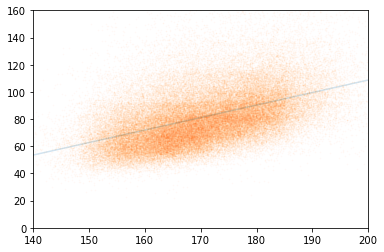

In [55]:
# Compute regression line
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.2)

# Plot the Data
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)

# Zoom into Data
plt.axis([140, 200, 0, 160])

# Show data
plt.show()

The slope of this line seems consistent with the scatter plot.

## Linear Relationships

However, linear regression has the same problem as correlation; it only measures the strength of a linear relationship. Here's the scatter plot of weight versus age, which you saw in a previous exercise:

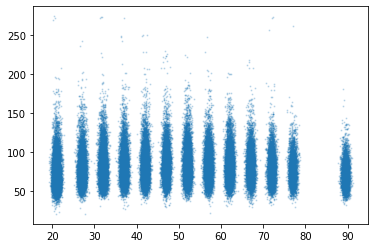

In [56]:
# Jittering
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))

# Plot the Data
plt.plot(age, weight, 'o', markersize=1, alpha=0.2)

# Show plot
plt.show()

People in their 40s are the heaviest; younger and older people are lighter. So the relationship is nonlinear.

## Nonlinear Relationships

If we don't look at the scatter plot and blindly compute the regression line, here's what we get.
:

In [57]:
subset = brfss.dropna(subset=['WTKG3', 'AGE'])

xs = subset['AGE']
ys = subset['WTKG3']

res = linregress(xs, ys)

print(res)

LinregressResult(slope=0.023981159566968724, intercept=80.07977583683224, rvalue=0.021641432889064068, pvalue=4.374327493007566e-11, stderr=0.003638139410742186, intercept_stderr=0.18688508176870167)


The estimated slope is only 0.02 kilograms per year, or 0.6 kilograms in 30 years.

And here's what the line of best fit looks like. 

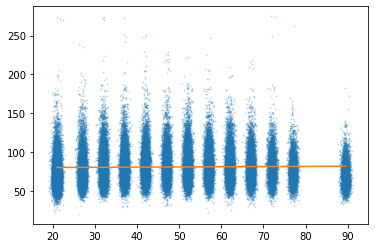

In [59]:
# Jittering
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))

# Plot the Data
plt.plot(age, weight, 'o', markersize=1, alpha=0.2)

# Computize Regression line
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

# Show plot
plt.show()

A straight line does not capture the relationship between these variables well.

## Exercise

### Income and Vegetables

As we saw in a previous exercise, the variable ``'_VEGESU1'`` represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

In [60]:
# Extract the variables
subset = brfss.dropna(subset=(['INCOME2', '_VEGESU1']))
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591)


#### Fit a line

Continuing from the previous exercise:

* Assume that ``xs`` and ``ys`` contain income codes and daily vegetable consumption, respectively, and

* ``res`` contains the results of a simple linear regression of ``ys`` onto ``xs``.

Now, you're going to compute the line of best fit.

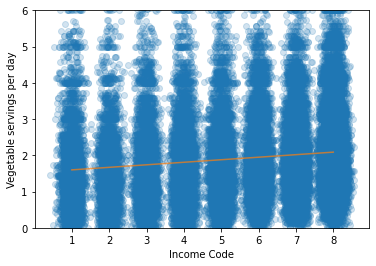

In [63]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

# Add labels to axes
plt.xlabel('Income Code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()